### 1. Align the reads to human genomes
You’re going to want to map these reads to the human genome first to remove any
contamination. To do this, check out the sample bowtie2 command from the PowerPoint

#### In terminal:
#### bowtie2 –p 4 --very-fast --no-unal -x /data/hg19/hg19 \-U /data/lab6/illumina_reads.fastq -S output.sam --un unaligned.fastq

```-x``` specifies the path to the database you want to align your reads to.In this case, is the database containing the human genome (data/hg19/hg19)

```-U``` specifies the path to your input reads in FASTQ format. In this case, the input read is the read from the sequencing run at (data/lab6/illumina_reads.fastq)

```-S``` specifies the path to the output SAM file

```--un``` tells Bowtie to dump the reads that couldn’t be aligned into a separate FASTQ file.This file should contain the reads that cannot be aligned from the read to the human database we have.

#### Result (the output message):

1124714 reads; of these:   
  1124714 (100.00%) were unpaired; of these:    
   1028379 (91.43%) aligned 0 times      
    87274 (7.76%) aligned exactly 1 time   
    9061 (0.81%) aligned >1 times    
8.57% overall alignment rate    
    
#### Analysis:
In all the reads, there are 7.76% aligned 1 time with the human genome and 0.81% aligned more than 1 time. Since we are trying to find reads aligned to the S. oneidensis reference genome, this means that those reads are aligned with the human genome database,and these are the "contaminating human DNA" from our sequencing library--which is 8.57% in total.

Therefore, the output.sam file contains the reads that aligned with the human genome (8.57%), which are the contaminating human DNA. And the unpaired ones that aligned 0 time (unaligned.fastq, which is 91.43%) are the filtered out ones we want.

### 2. Align the reads to the S. oneidensis reference genome
Now, let’s find out how well your bacterium was sequenced. Run bowtie2 again, using the filtered reads you obtained in the previous step as input and the Shewanella reference genome as a database.



#### In terminal:
#### bowtie2 –p 4 --very-fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 \-U ~/lab6_Joanne/unaligned.fastq -S output2.sam --un unaligned2.fastq

In the unaligned2.fastq this contains the reads that are not aligned to the S. oneidensis. 

#### Result (output message):
1028379 reads; of these:      
  1028379 (100.00%) were unpaired; of these:     
    299560 (29.13%) aligned 0 times     
    687571 (66.86%) aligned exactly 1 time     
    41248 (4.01%) aligned >1 times     
70.87% overall alignment rate    

#### Analysis:
According to the output, the output2.sam contains reads that are aligned to the S. oneidensis (70.87%, which is the one we want). And the unaligned2.fastq contains what our filtered library does not aligned with S. oneidensis genome (29.13%)

If using the --very-sensitive instead of --very-fast, the results output was the same (aligned percentage=70.87%)

### 3. Generate a coverage plot
At this point, you should have a SAM file containing the alignment of your filtered reads to the
S. oneidensis reference genome. Referring to the PowerPoint, please convert this file to BAM,
sort it, index it, and use “depth” to generate a file containing the depth of coverage for every
position in the reference genome.

#### In terminal: 
samtools view -b output2.sam > output2.bam

- This converts sam file into bam file

samtools sort output2.bam > output2.sorted.bam

- This sorted the bam file by coordinates

samtools index output2.sorted.bam

- This created index of the bam file

samtools depth -a output2.sorted.bam > pileup.tab

- This generates a list of coordinates in a genome and the number of times a read aligned to that position


#### Generating plots
In order to generate a scatter plot, first pull the data from pileup.tab into two separated integer list by using delimiter \t (this separates the tab file by columns). Import csv in this case to read the tab file.        
x list= position in genome   
y list= depth of coverage      
After making the two lists, import numpy and matplotlib to plot out the data into a scatter plot.With x-axis the position in genome and y-axis the coverage depth.   

For plotting a histogram, we only need the depth of coverage to plot (y list). This gives a histogram with depth of coverage on the x-axis and the counts on how many positions have that coverage on the y-axis.    
Below also gives the min, max and average value of the depth of coverage across all positions in the genome.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import csv

y = []           #list of depth coverage values

with open('pileup.tab','r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')    #split up the values by columns
    for i in plots:
        y.append(int(i[2]))          #adding each value read into list y
print("The minimum coverage: ")
print(min(y))
print("The maximum coverage: ")
print(max(y))
print("The average coverage: ")
print(np.mean(y))

The minimum coverage: 
1
The maximum coverage: 
269
The average coverage: 
36.95638840970833


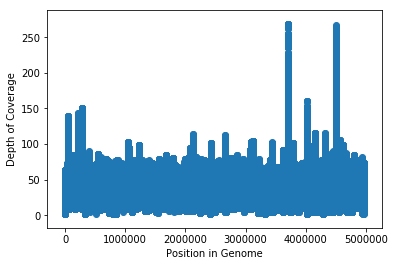

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv

x = []       #list of positions in genome
y = []       #list of depth of coverage

with open('pileup.tab','r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for i in plots:
        x.append(int(i[1]))   #adding each value read into list x
        y.append(int(i[2]))   #adding each value read into list y

plt.ylabel('Depth of Coverage')
plt.xlabel('Position in Genome')
plt.xticks(np.arange(0, 6000000, 1000000)) #adding x-axis ticks
plt.yticks(np.arange(0, 400, 50))          #adding y-axis ticks
plt.scatter(x,y) 
plt.show()

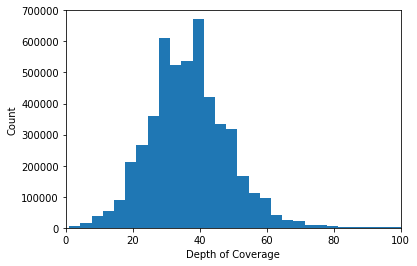

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv

y = []

with open('pileup.tab','r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for i in plots:
        y.append(int(i[2]))

plt.xlabel('Depth of Coverage')
plt.ylabel('Count')

plt.axis([0, 100, 0, 700000])         #defining the x and y-axis
plt.hist(y,bins=80)                   #bins mean the number of n that would be plotted out
plt.show()


#### Analysis:
The scatter plot shows the depth of coverage in each position in the genome. By calculation, we found out that the minimum coverage value is 1, maximum is 269, and the mean is around 37 across all positions in genome.According to the plot, there are 2 peaks of depth of coverage which appear between position 3000000 and 5000000 in genome.    
The histogram shows a distribution of counts of position for the depth of coverage values. According to the plot, most counts appear at deapth of coverage= 40, and the count is nearly 700000.